In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv("C:/Users/HP/Downloads/stree/SaYoPillow.csv")

In [15]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sh      630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB
None


In [16]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sr     0
rr     0
t      0
lm     0
bo     0
rem    0
sh     0
hr     0
sl     0
dtype: int64


In [17]:
df = df.dropna()

In [18]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               sr          rr          t          lm          bo         rem  \
count  630.000000  630.000000  630.00000  630.000000  630.000000  630.000000   
mean    71.600000   21.800000   92.80000   11.700000   90.900000   88.500000   
std     19.372833    3.966111    3.52969    4.299629    3.902483   11.893747   
min     45.000000   16.000000   85.00000    4.000000   82.000000   60.000000   
25%     52.500000   18.500000   90.50000    8.500000   88.500000   81.250000   
50%     70.000000   21.000000   93.00000   11.000000   91.000000   90.000000   
75%     91.250000   25.000000   95.50000   15.750000   94.250000   98.750000   
max    100.000000   30.000000   99.00000   19.000000   97.000000  105.000000   

               sh          hr          sl  
count  630.000000  630.000000  630.000000  
mean     3.700000   64.500000    2.000000  
std      3.054572    9.915277    1.415337  
min      0.000000   50.000000    0.000000  
25%      0.500000   56.250000    1.000

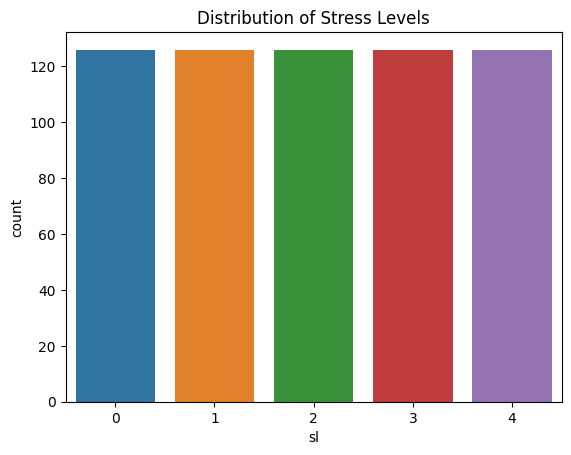

In [19]:
# Distribution of the target variable 'sl'
sns.countplot(x='sl', data=df)
plt.title('Distribution of Stress Levels')
plt.show()

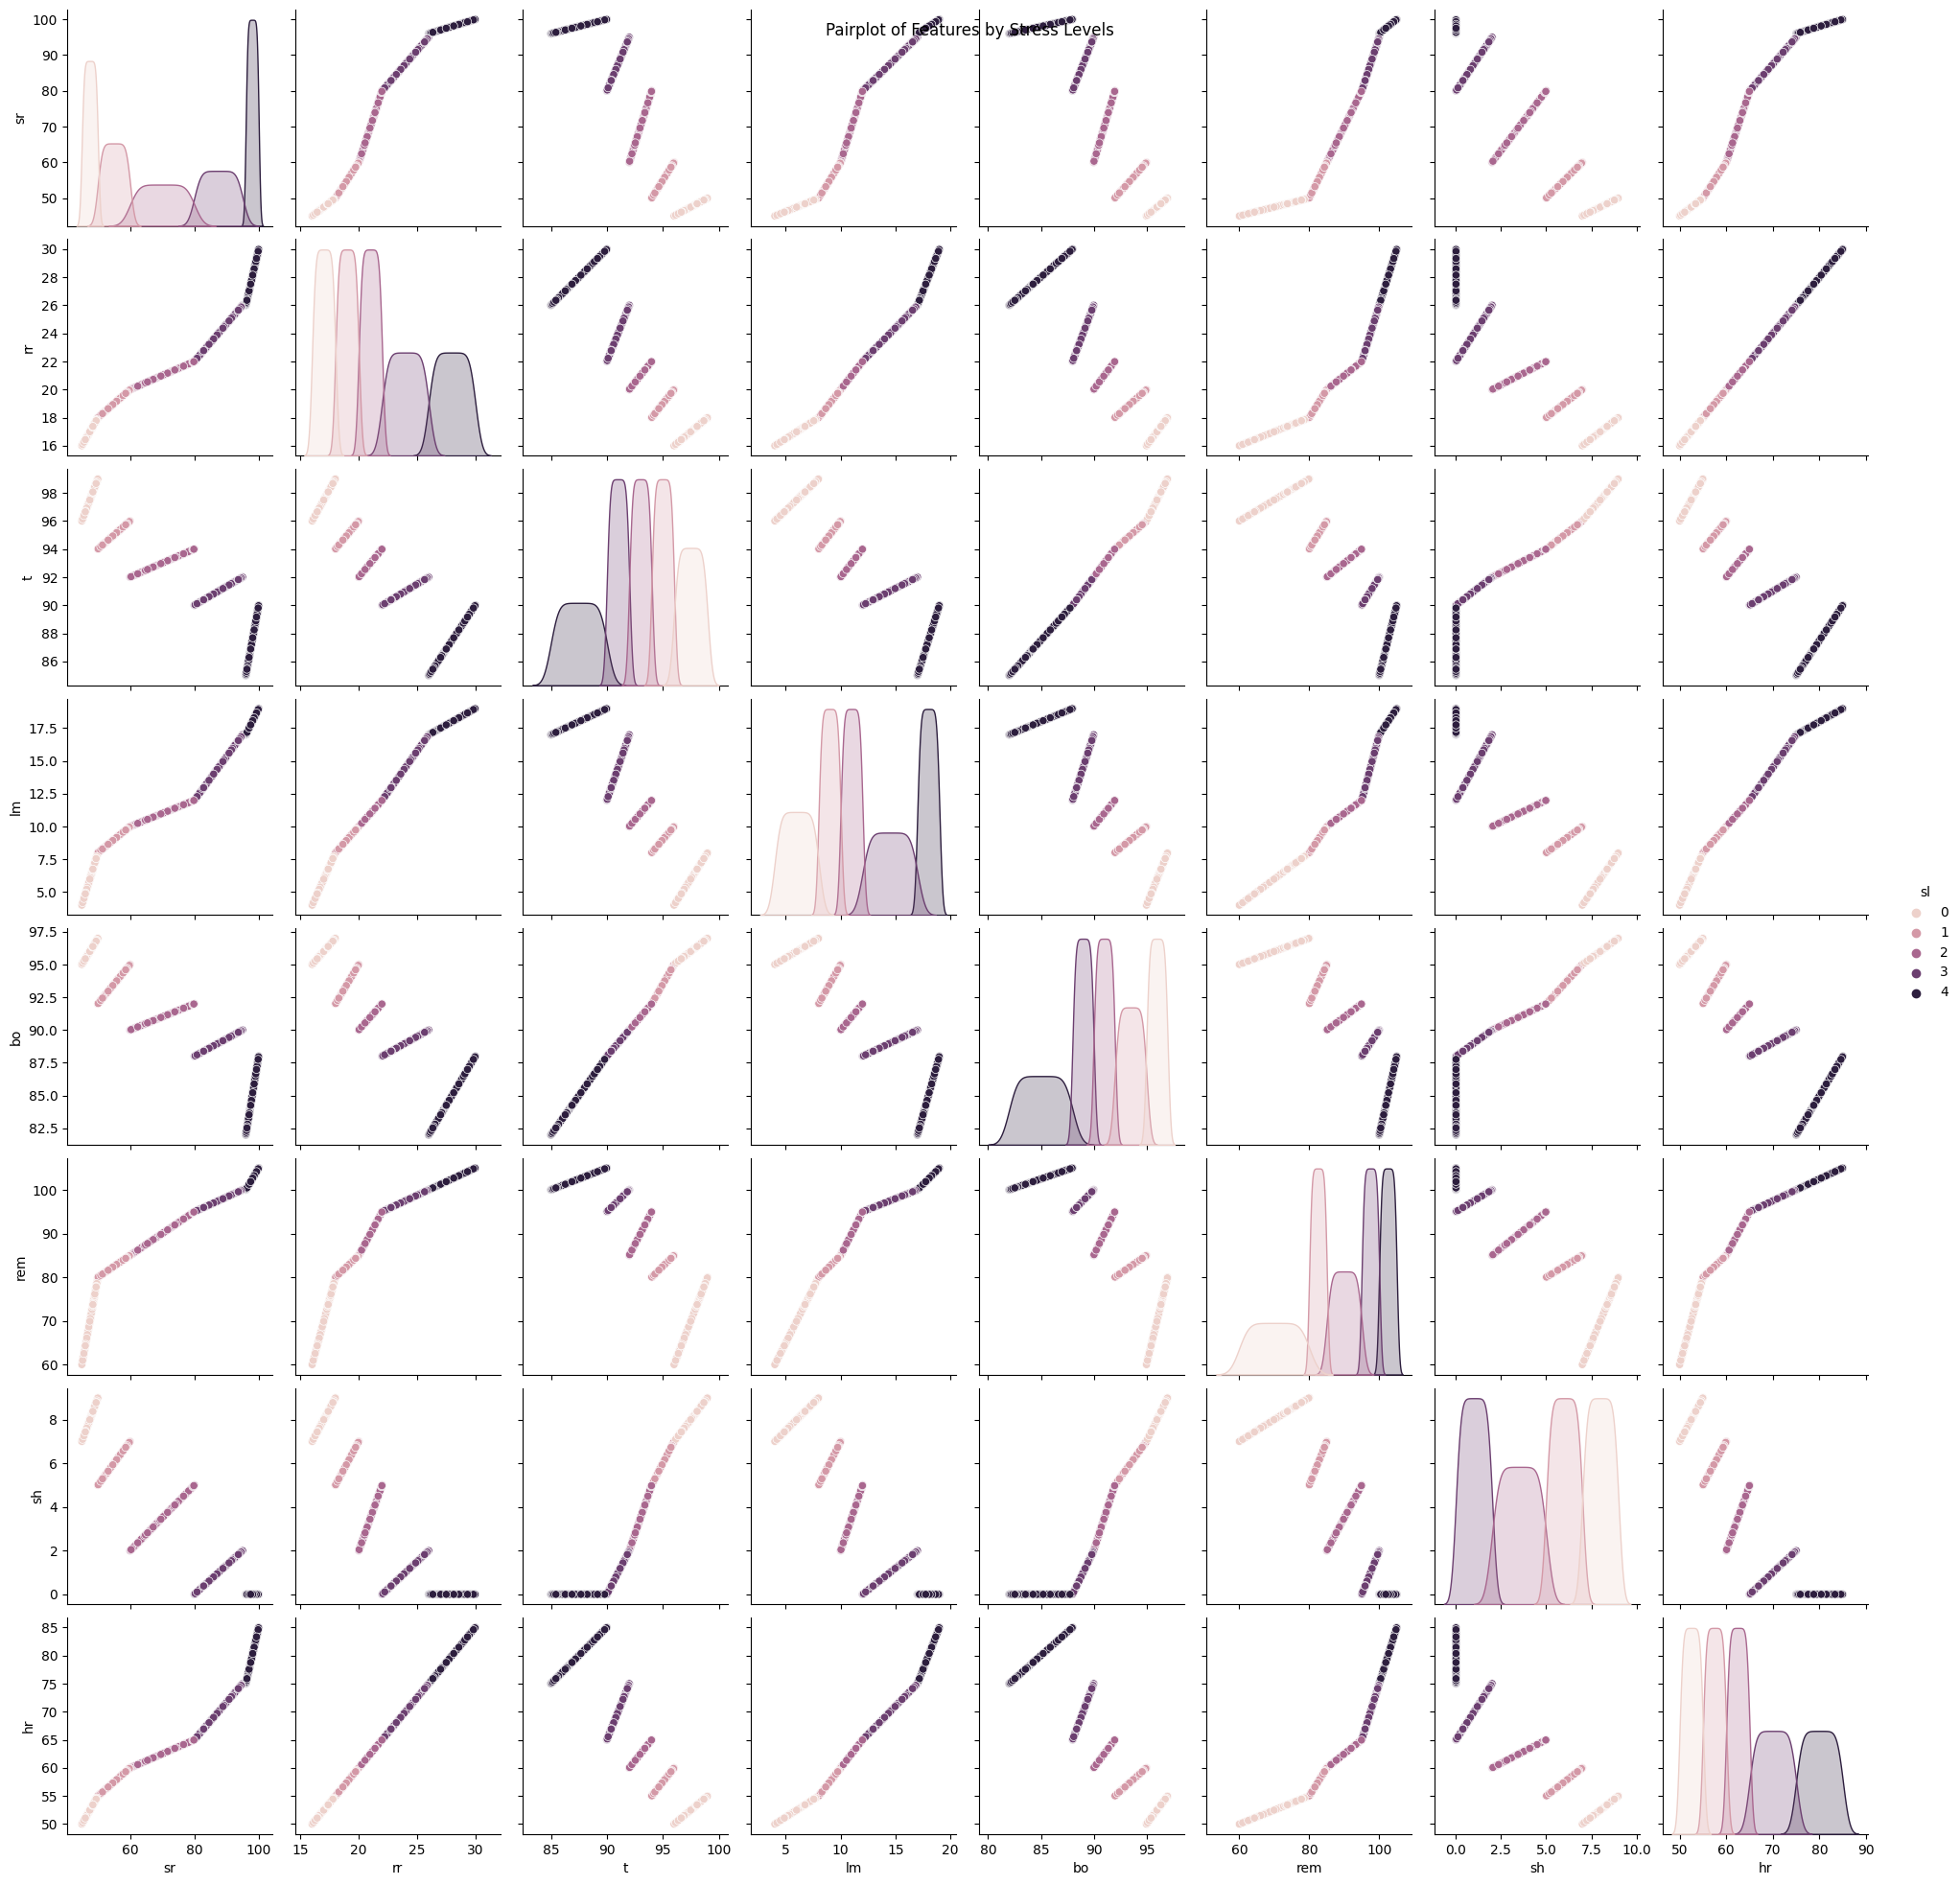

In [20]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='sl', diag_kind='kde')
plt.suptitle('Pairplot of Features by Stress Levels')
plt.show()

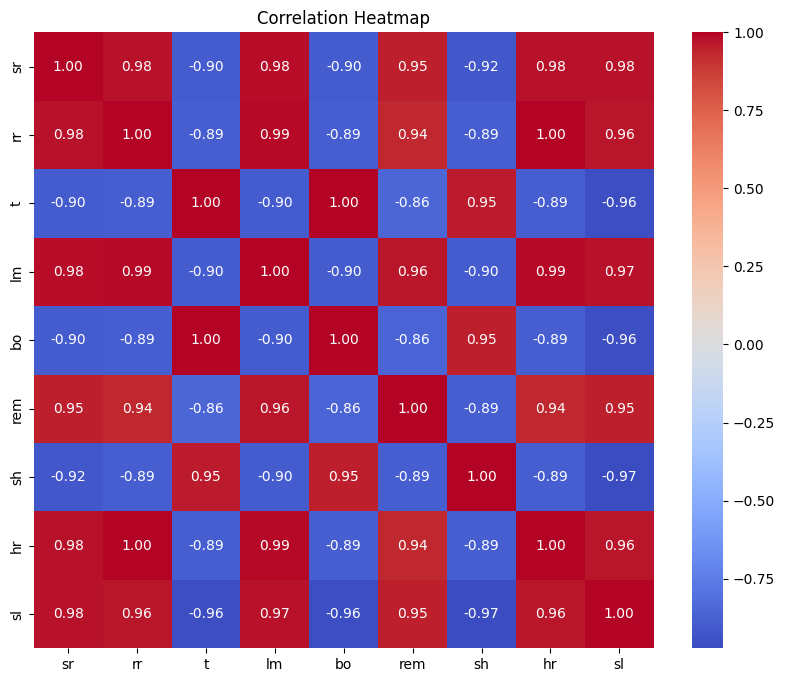

In [21]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

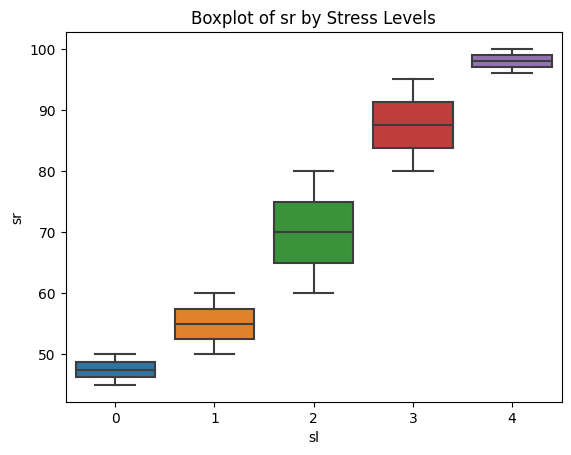

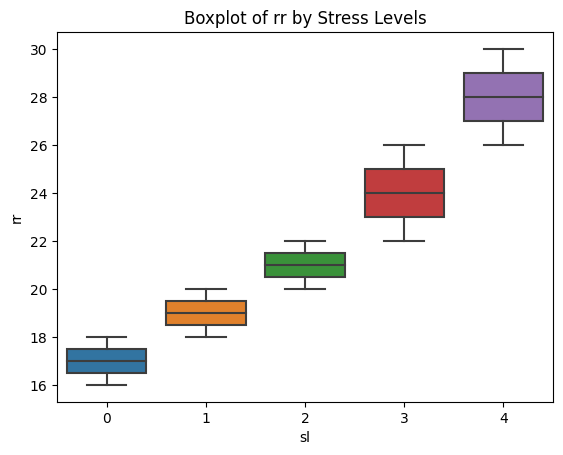

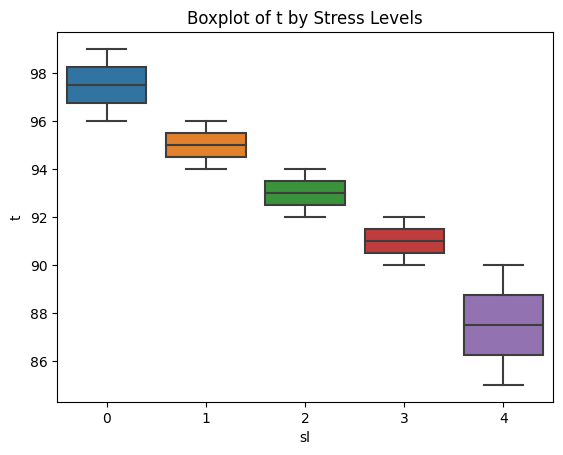

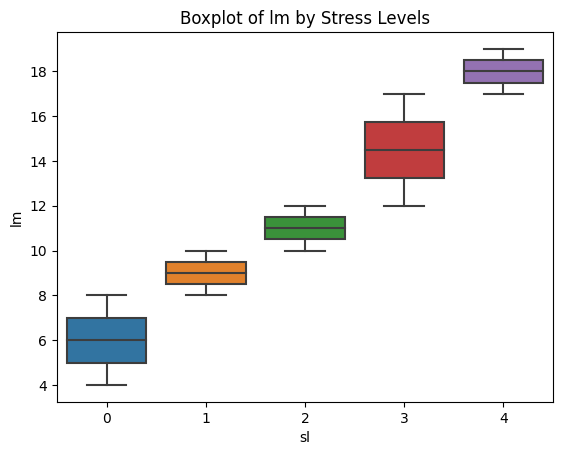

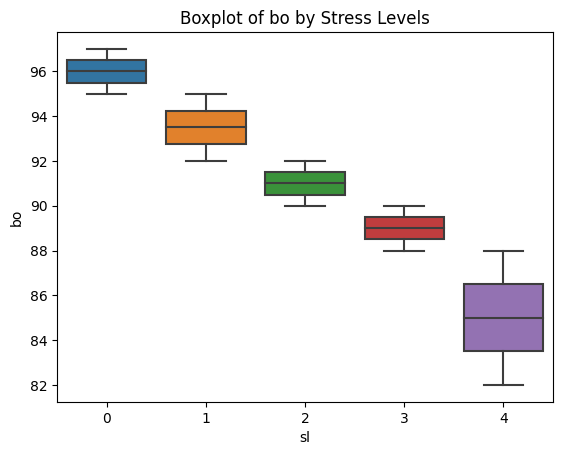

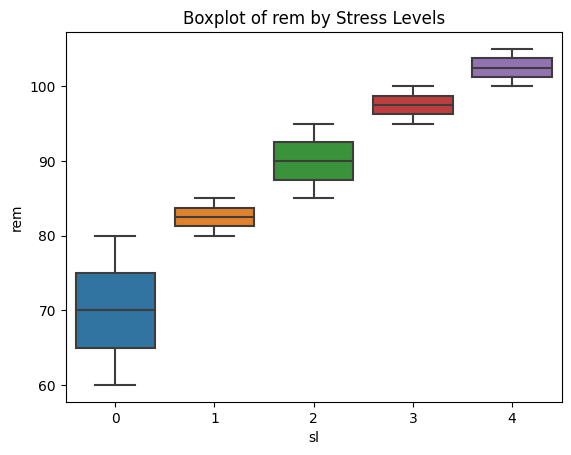

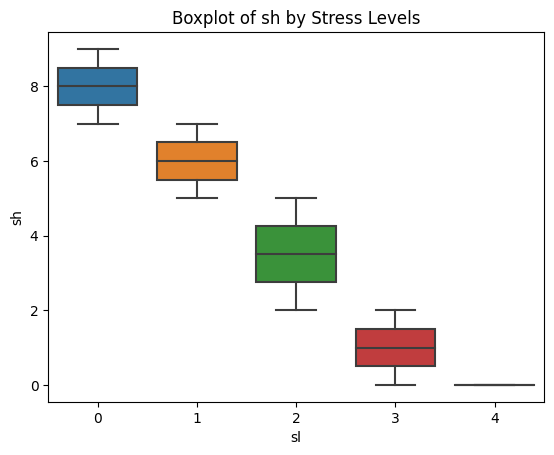

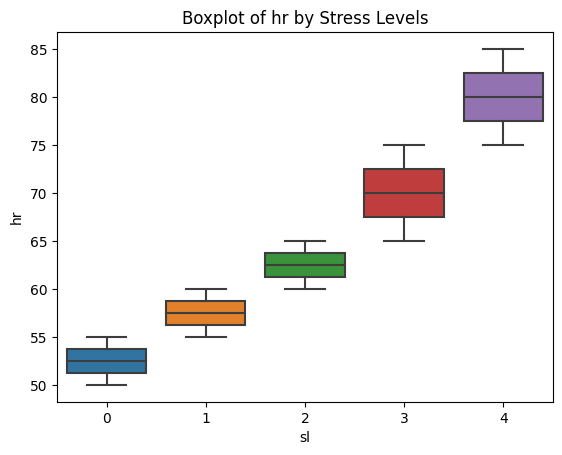

In [22]:
# Boxplots for individual features by stress levels
features = ['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sh', 'hr']
for feature in features:
    sns.boxplot(x='sl', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Stress Levels')
    plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into features (X) and target variable (y)
X = df.drop('sl', axis=1)
y = df['sl']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9841269841269841
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

